### Springboard CapstoneOne: Market Basket Analysis

Exploratory Data Analysis (EDA)

The data exploration is done at two levels:

1.  Baseline Exploration

    To explore general data characteristics without regard to model development

2. Model-focused exploration

    To explore data characteristics that may influence product reordering, the metric we are interested in predicting

#### -- Rose Zdybel

# Import and Preview data from each of the input files:
 
 'aisles.csv',
 'departments.csv',
 'orders.csv',
 'order_products__prior.csv',
 'order_products__train.csv',
 'products.csv',



##### extract  info for 10 customers to set up EDA stuff


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
import os
os.getcwd()

'C:\\Users\\rozoe\\jy\\SpringBoardCapstoneOne'

In [3]:
os.listdir('data')

['aisles.csv',
 'departments.csv',
 'orders.csv',
 'order_products__prior.csv',
 'order_products__train.csv',
 'products.csv',
 'sample_submission.csv']

In [4]:
sample_submission = pd.read_csv('data\\sample_submission.csv')# read in data
aisles = pd.read_csv('data\\aisles.csv')
departments = pd.read_csv('data\\departments.csv')
orders = pd.read_csv('data\\orders.csv')
order_products__prior = pd.read_csv('data\\order_products__prior.csv')
order_products__train = pd.read_csv('data\\order_products__train.csv')
products = pd.read_csv('data\\products.csv')
sample_submission = pd.read_csv('data\\sample_submission.csv')

In [5]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
orders.eval_set.unique()

array(['prior', 'train', 'test'], dtype=object)

In [9]:
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [10]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [11]:
order_products__train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
order_id             1384617 non-null int64
product_id           1384617 non-null int64
add_to_cart_order    1384617 non-null int64
reordered            1384617 non-null int64
dtypes: int64(4)
memory usage: 42.3 MB


In [12]:
order_products__prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB


In [13]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


# Dataset Sizes


Text(0.5, 0, 'Size (number of rows)')

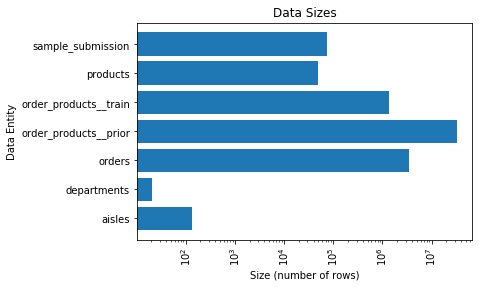

In [14]:
dslist = os.listdir('data')
dslist =  [i.replace('.csv','') for i in dslist]
dslist =  [i.replace("'" ,'') for i in dslist]
dslist
dssize = [len(aisles),
         len(departments),
         len(orders),
         len(order_products__prior),
         len(order_products__train),
         len(products),
         len(sample_submission)         
         ] 
dssize
plt.barh(dslist,dssize,log=True)
plt.xticks(rotation=90)
plt.title('Data Sizes')
plt.ylabel('Data Entity')
plt.xlabel('Size (number of rows)')

In [15]:
dssizeinfo = pd.DataFrame({'name': list(dslist),'size':list(dssize)} )
#dssizeinfo = pd.DataFrame(list(dslist),list(dssize) )
dssizeinfo

,name,size
0,aisles,134
1,departments,21
2,orders,3421083
3,order_products__prior,32434489
4,order_products__train,1384617
5,products,49688
6,sample_submission,75000


#  Number of orders per customer in dataset 

How many orders do customers have in the dataset?

The plot refelects the information stated on the Kaggle data source website, that each customer has between 4 and 100 orders.  Most users have fewer that 20 order, with a mean of 10.

Text(0, 0.5, 'Number of Customer')

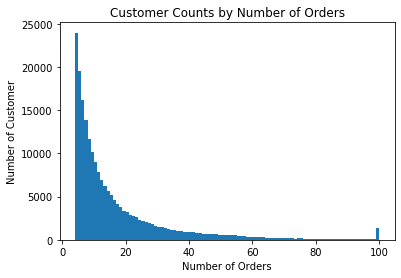

In [16]:
orderspercustomer = orders.groupby('user_id').agg(ordercount=('order_number',
                                                               max)).sort_values('ordercount',
                                                                                 ascending=False)


plt.hist(orderspercustomer.ordercount,bins=96)
plt.title('Customer Counts by Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customer')


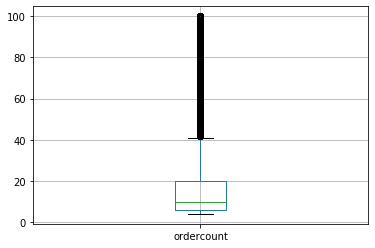

In [17]:
# get the statistics for order counts

#orderspercustomer.info()
orderspercustomer.describe()
orderspercustomer.boxplot()


# Use FULL Data Set 


In [18]:
xop = order_products__prior
xorders = orders

# NUMBER OF ORDERS

## Number of Orders by DOW

Days 0 and 1 are the most popular, having roughly 600k orders each, while the other days of the week each have roughly 450k orders.


Text(0, 0.5, 'Number of Orders')

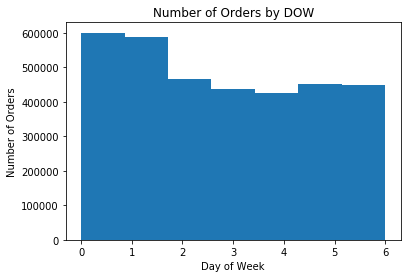

In [19]:
plt.hist(xorders.order_dow, bins=7)
plt.title('Number of Orders by DOW')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')


## Number of Orders by Hour of Day

Most of the orders are between hours 10 and 16 (10:00 a.m. and 4:00 p.m.), with a fairly even distribution between those times.

In [20]:
xorders.order_hour_of_day.describe()

count    3.421083e+06
mean     1.345202e+01
std      4.226088e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

Text(0, 0.5, 'Number of Orders')

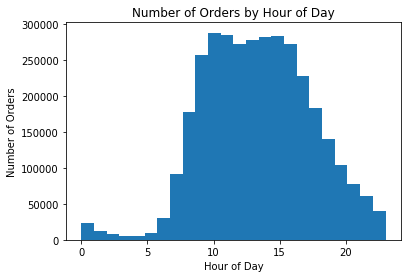

In [21]:

plt.hist(xorders.order_hour_of_day, bins=24)
plt.title('Number of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')


## Number of Orders vs elapsed days (time between orders)

 ####   * how often do users shop?
    
    
    
 ##### *  NOTE:  it looks as though orders that have a delta days of more than 30 are truncated assigned to 30.
 The most common shopping frequency is every 7 days, and frequency declines for higher intervals

Text(0, 0.5, 'Number of Orders')

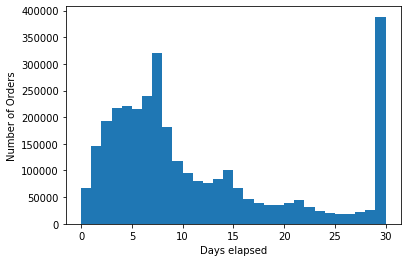

In [22]:
# time between orders
nbins=int(xorders.days_since_prior_order.max())
nbins
plt.hist(xorders.days_since_prior_order.dropna(),bins=nbins,density=False)
plt.xlabel('Days elapsed')
plt.ylabel('Number of Orders')

# ORDER SIZE

#### Time of Purchase Analysis -- prejoin data for multiple re-use

In [23]:
# time of day (tod)
tod = pd.merge(xorders[['user_id','order_id','order_dow','order_hour_of_day']],
        xop[['order_id','reordered']])

## Order size distribution

Order sizes range from 1 item to 145 items, with  most order sizes being between 5 and 14 items.  The median order size is 8, and the mean is 10 items. 

Text(0.5, 1.0, 'Order size distribution')

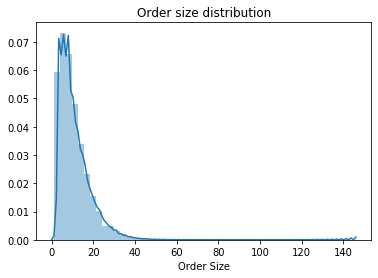

In [24]:

order_size = xop.groupby('order_id').agg(ordersize=('add_to_cart_order',
                                                    'max')).sort_values('ordersize',
                                                                        ascending=False).reset_index()
                                                                                            

#plt.hist(order_size.ordersize)
sns.distplot(order_size.ordersize).set(xlabel='Order Size')
plt.title('Order size distribution')

,order_id,ordersize
count,3.214874e+06,3.214874e+06
mean,1.710827e+06,1.008888e+01
std,9.875206e+05,7.525398e+00
min,2.000000e+00,1.000000e+00
25%,8.556832e+05,5.000000e+00
50%,1.711120e+06,8.000000e+00
75%,2.566034e+06,1.400000e+01
max,3.421083e+06,1.450000e+02


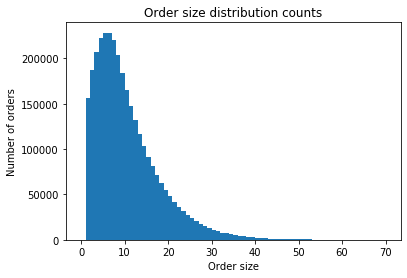

In [25]:
# zoom in on lower range
plt.hist(order_size.ordersize,range=(0,70),bins=70)
plt.xlabel('Order size')
plt.ylabel('Number of orders')
plt.title('Order size distribution counts')

order_size.describe()

## Order size by DOW

Days 0 and 6 have slightly higher order sizes with  medians of 9 items and means around 11 items; other days have  medians of 8 items and means between 9.3 and 10.2 items


Text(0.5, 1.0, 'Order Size by Day of Week')

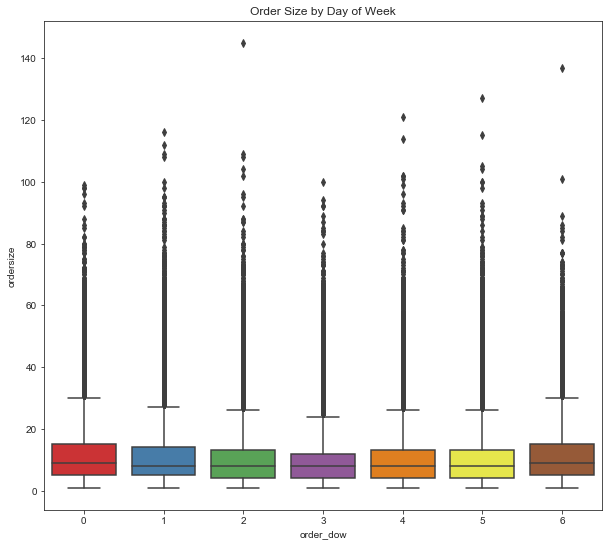

In [26]:
# DOW order size
dordersize = tod.groupby(['order_id','order_dow']).agg(ordersize=('reordered','count')).reset_index()

sns.set_style('ticks')
fig, ax = plt.subplots()
# set size
fig.set_size_inches(10, 9)

sns.boxplot(x="order_dow", y="ordersize", 
            data=dordersize, 
            palette="Set1")

plt.title('Order Size by Day of Week')

In [27]:
# get the median values (it's difficult to distinguish from the chart)
dordersize.groupby('order_dow').agg(mean=('ordersize','mean'), median=('ordersize','median'))

,mean,median
order_dow,,
0,11.132983,9
1,10.177484,8
2,9.543501,8
3,9.321331,8
4,9.439436,8
5,9.881950,8
6,10.744480,9


## Order size by Hour of Day

Orders between 21 hours and 0 hours have a slightly more likeliness to be larger

Text(0.5, 1.0, 'Order Size by Hour of Day')

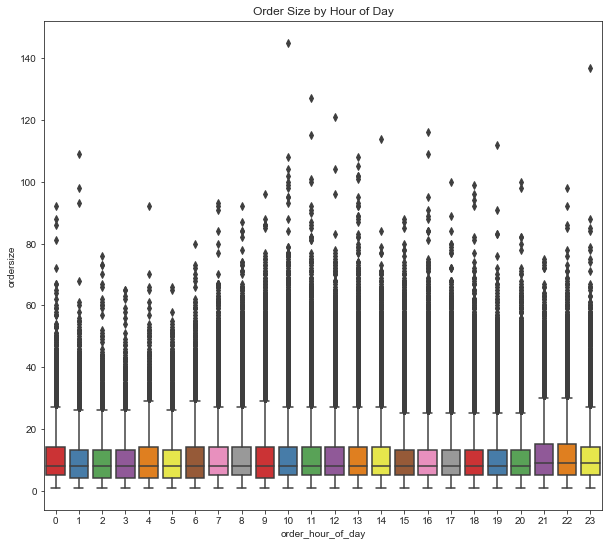

In [28]:
# Hour of Day order size
hodordersize = tod.groupby(['order_id','order_hour_of_day']).agg(ordersize=('reordered','count')).reset_index()

sns.set_style('ticks')
fig, ax = plt.subplots()
# set size
fig.set_size_inches(10, 9)

sns.boxplot(x="order_hour_of_day", y="ordersize", 
            data=hodordersize, 
            palette="Set1")

plt.title('Order Size by Hour of Day')

##  Order size vs elapsed days

Does the size of the time gap between orders affect order size?
        
The order size increases as elapsed times increase from 0 to 7 days, then stays fairly constant from 8 to 30 days.


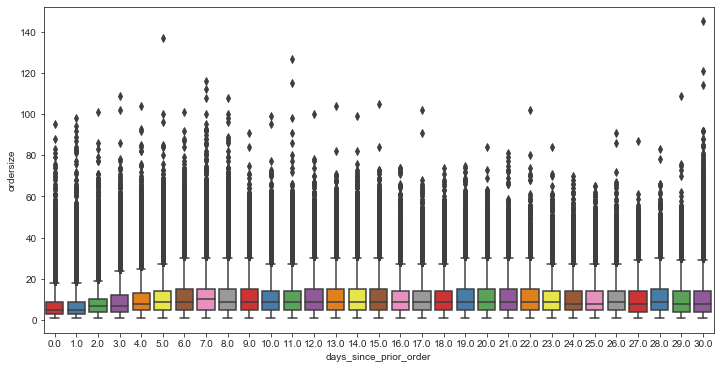

In [29]:
#  items in order vs days between orders

order_size = xop.groupby('order_id').agg(ordersize=('add_to_cart_order',
                                                    'max')).sort_values('ordersize',
                                                                        ascending=False).reset_index()

ordersizedeltadays = pd.merge(order_size, xorders[['order_id','days_since_prior_order']])

# try another plot type

#https://python-graph-gallery.com/34-grouped-boxplot/

sns.set_style('ticks')
fig, ax = plt.subplots()
# set size
fig.set_size_inches(12, 6)

sns.boxplot(x="days_since_prior_order", y="ordersize",  data=ordersizedeltadays, palette="Set1")


# ITEMS SOLD

In [30]:
# Aggregating products once, since it is reused multiple times in subsequent steps
product_counts = xop.groupby('product_id').agg(quantity_sold=('order_id',
                                                                'count')).sort_values('quantity_sold',
                                                                                      ascending=False).reset_index()

## Product counts by Volume Sold
Q: What is the volume distribution of products?

A: A handful of products have high volumne (near 400K items), while the majority are below 100K items

Text(0, 0.5, 'Number of Product_Ids')

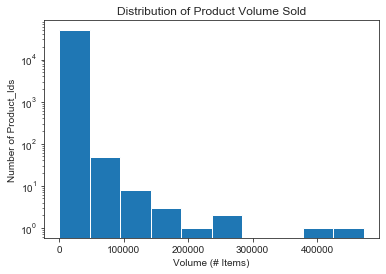

In [31]:

# histogram of product Quantity sold 
plt.hist(product_counts.quantity_sold, log=True)
plt.title('Distribution of Product Volume Sold')
plt.xlabel('Volume (# Items)')
plt.ylabel('Number of Product_Ids')


## Quantity Sold by Product (Most popular items)

Q: How much of each product was sold?

Q: What are the best-selling items?
    
A: The most popular items are  fresh fruits and vegetables, along with milk.

Text(0.5, 1.0, 'Top 20 Ordered Items')

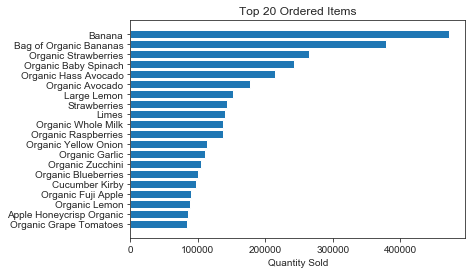

In [32]:
#product_counts = xop.groupby('product_id').agg(quantity_sold=('order_id',
#                                                                'count')).sort_values('quantity_sold',
#                                                                                      ascending=False).reset_index()
product_counts

# decode product_id
top20 = pd.merge(product_counts.head(20), products).sort_values('quantity_sold')
plt.barh(top20['product_name'], top20['quantity_sold'])
plt.xlabel('Quantity Sold')
plt.title('Top 20 Ordered Items')

## Quantity sold by Department

The most popular department is produce, followed by dairy/eggs, then snacks and beverages.

Text(0.5, 1.0, 'Quantity sold by Department')

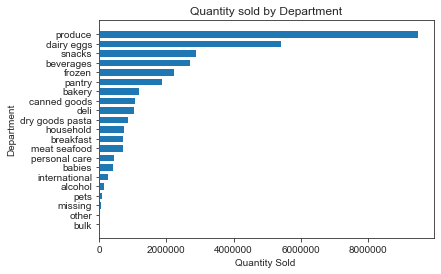

In [33]:
deptcounts = pd.merge(xop['product_id'], 
                       products[['department_id',
                                'product_id']]).groupby('department_id').agg(deptcount=('product_id',
                                                               'count')).sort_values('deptcount',
                                                                                 ascending=True).reset_index()
# decode department information
deptcountsdecode = pd.merge(deptcounts,departments)

plt.barh( deptcountsdecode['department'],deptcountsdecode['deptcount'])

plt.xlabel('Quantity Sold ')
plt.ylabel('Department')
plt.title('Quantity sold by Department')

## Quantity sold by Aisle

The most popular aisles are fresh fruits, fresh vegetables, packaged produce, then various dairy aisles.

Text(0.5, 1.0, 'Quantity sold by Top 20 Aisles')

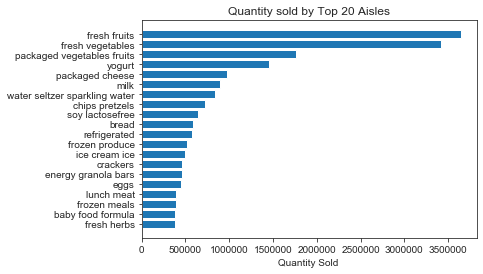

In [34]:
aislecounts = pd.merge(xop['product_id'], 
                       products[['aisle_id',
                                'product_id']]).groupby('aisle_id').agg(aislecount =('product_id',
                                                               'count')).sort_values('aislecount',
                                                                                 ascending=True).reset_index()
aislecounts


aislecountsdecode = pd.merge(aislecounts,aisles)
aislecounttop20 = aislecountsdecode.tail(20)  # data sorted in ascending order for plotting purposes


plt.barh( aislecounttop20['aisle'],aislecounttop20['aislecount'])

plt.xlabel('Quantity Sold ')
plt.title('Quantity sold by Top 20 Aisles')

# MODEL-RELATED ANALYSIS

This section explores reordering characistics of the data

##  Proportion of basket items that are reordered products

Almost 60 percent of basket items are reordered, while 40 percent are not.

Text(0.5, 1.0, 'Proportion Reordered')

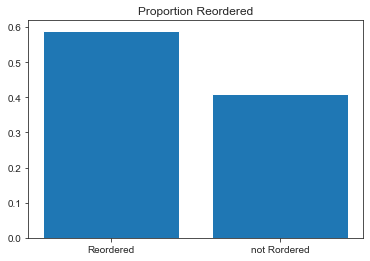

In [35]:
reorderedprop = np.mean(xop.reordered)

plt.bar(['Reordered','not Rordered'],[reorderedprop, 1- reorderedprop])
plt.title('Proportion Reordered')


## Reorder propensity by user

Proportion of basket items reordered vary widely by individual user, ranging from less than 10% to over 90%, with the majority falling in the 30% to 60%  range

Text(0, 0.5, 'Count of Users')

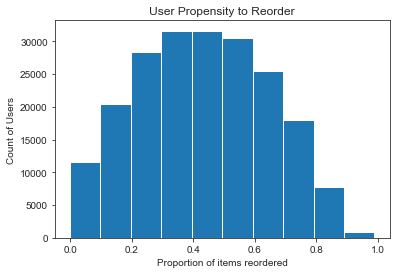

In [36]:
# Proportion of cart items that are reorders by user_id

reorderproportionbyuser = tod.groupby(['user_id']).agg(reorderproportion=('reordered','mean')).reset_index()

reorderproportionbyuser.describe()

plt.hist(reorderproportionbyuser.reorderproportion)

plt.title('User Propensity to Reorder')
plt.xlabel('Proportion of items reordered')
plt.ylabel('Count of Users')



# Reorder Counts

## Reorder Counts by Product Id

Which products are most/least reordered?

Produce and Dairy items top the list of products most reordered.

Text(0.5, 1.0, '20 Most ReOrdered Items')

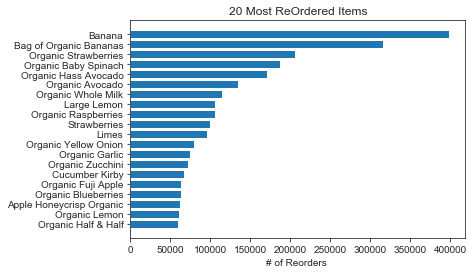

In [37]:
reordercounts = xop.groupby('product_id').agg(reorder_count=('reordered',sum)).sort_values('reorder_count',
                                                                                           ascending=False)
reordercounts.reset_index(inplace=True)
reordercounts

# decode product_id
#pd.merge(reordercounts.head(25),products) 
# similar to quantity sold...but not quite the same, since that does not indicate reorders...
# .... e.g., could be cheap samples or promos

top20reorderitems = pd.merge(reordercounts.head(20),products).sort_values('reorder_count')

plt.barh(top20reorderitems.product_name, top20reorderitems['reorder_count'])

plt.xlabel('# of Reorders ')
plt.title('20 Most ReOrdered Items')

Text(0.5, 1.0, '20 Least ReOrdered Items')

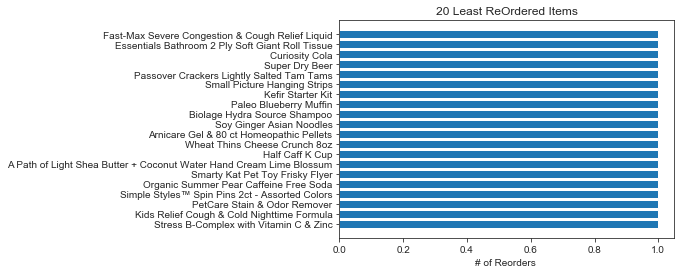

In [38]:
#least reordered
leastreordered = pd.merge(reordercounts[reordercounts['reorder_count']>0].tail(20),products) 
# similar to quantity sold...but not quite the same, since that does not indicate reorders...
# .... e.g., could be cheap samples or promos
leastreordered


plt.barh(leastreordered.product_name, leastreordered['reorder_count'])

plt.xlabel('# of Reorders ')
plt.title('20 Least ReOrdered Items')

## Reorder counts by department

Items in the produce and dairy/egg departments are most likely to be reordered, followed by items in the beverage and snacks departments

Text(0.5, 1.0, 'Reorder counts by Department')

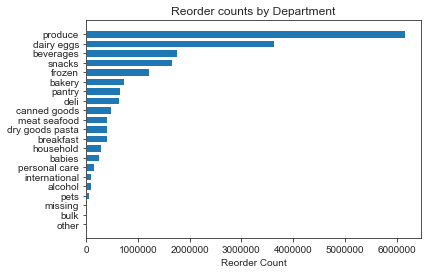

In [39]:
deptreorder = pd.merge(xop[xop.reordered==1]['product_id'], 
                       products[['department_id',
                                'product_id']]).groupby('department_id').agg(deptreordercount=('product_id',
                                                               'count')).sort_values('deptreordercount',
                                                                                 ascending=True).reset_index()
deptreorder


deptreorderdecode = pd.merge(deptreorder,departments)

plt.barh( deptreorderdecode['department'],deptreorderdecode['deptreordercount'])

plt.xlabel('Reorder Count')
plt.title('Reorder counts by Department')


##  Reorder Counts by Aisle

Not surprisingly this is similar to item purchases: with fresh fruits, fresh vegetables, and packaged produce most popular, followed by various dairy aisles (although not necesarily in the same order).
 

Text(0.5, 1.0, 'Top 20 Aisles for Reorders')

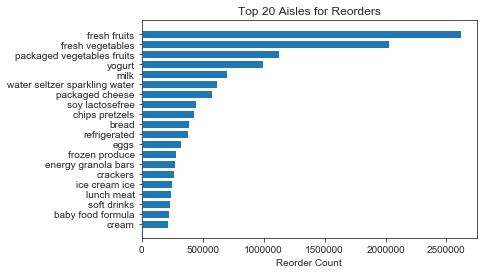

In [40]:
aislereorder = pd.merge(xop[xop.reordered==1]['product_id'], 
                       products[['aisle_id',
                                'product_id']]).groupby('aisle_id').agg(aislereordercount=('product_id',
                                                               'count')).sort_values('aislereordercount',
                                                                                 ascending=True).reset_index()
aislereorder
aislereorderdecode = pd.merge(aislereorder,aisles)
aislereordertop20 = aislereorderdecode.tail(20)  # data is sorted ascending for plotting purposes

plt.barh( aislereordertop20['aisle'],aislereordertop20['aislereordercount'])
plt.xlabel('Reorder Count')
plt.title('Top 20 Aisles for Reorders')


# Reorder Proportions

##  Reorder proportion Overall 

Text(0.5, 1.0, 'Proportion Reordered')

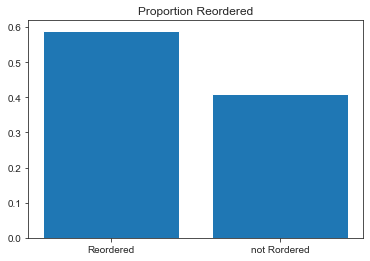

In [41]:
# Proportion of item purchases that are reorders
reorderedprop = np.mean(xop.reordered)

plt.bar(['Reordered','not Rordered'],[reorderedprop, 1- reorderedprop])
plt.title('Proportion Reordered')


##  Reorder proportion vs elapsed days

In general, the proportion of baseket items reordered decreases as elapsed days increases (with the exception of between 0 and 2 days).  


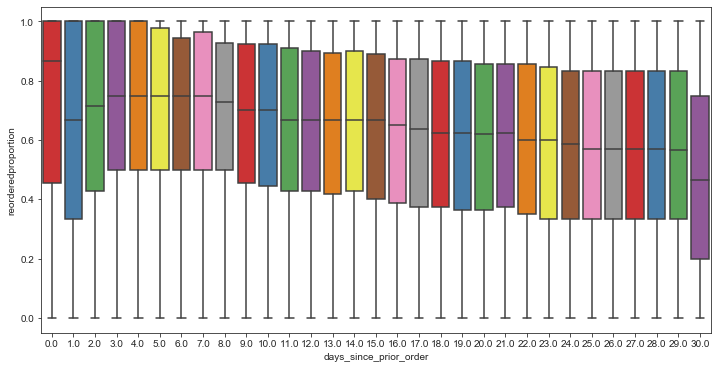

In [42]:

reorderproportionbyorderid = xop.groupby('order_id').agg(reorderedproportion=('reordered','mean')).reset_index()
reorderproportionbydayslapsed = pd.merge(reorderproportionbyorderid, xorders[['order_id','days_since_prior_order']])
reorderproportionbydayslapsed
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 6)


sns.boxplot(x="days_since_prior_order", 
            y="reorderedproportion",
            data=reorderproportionbydayslapsed,
            ax=ax,
            palette="Set1")


## Reorder proportion by DOW  

Orders made on days 0 and 6  have a slightly lower proportion of reordered items. Purchases made on Day 1 are slightly less likely to have non-reordered items


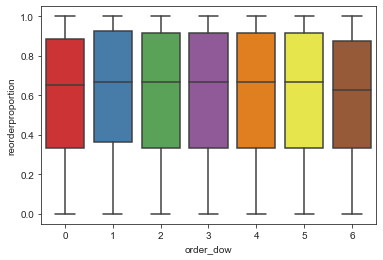

In [43]:
# DOW reorder proportion
dowproportion = tod.groupby(['order_id','order_dow']).agg(reorderproportion=('reordered','mean')).reset_index()

sns.boxplot(x="order_dow", y="reorderproportion", 
            data=dowproportion, 
            palette="Set1")


## Reorder Proportion  by Hour of Day

The proportion of basket items reordered varies by hour of day: with orders early in the morning (between 5 and 9 o'clock)  more likely to have a higher proportion of reordered items


Text(0.5, 1.0, 'Proportion reordered by Hour of Day')

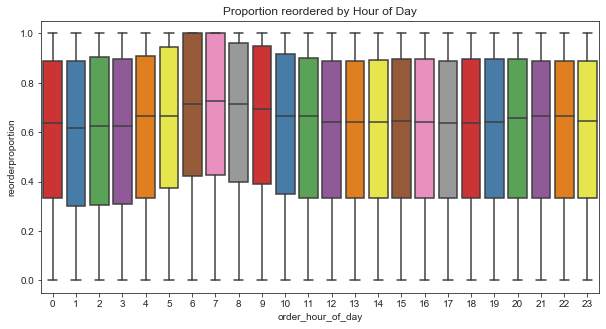

In [44]:
# Hour of Day reorder proportion (hod)
hodproportion = tod.groupby(['order_id','order_hour_of_day']).agg(reorderproportion=('reordered','mean')).reset_index()



sns.set_style('ticks')
fig, ax = plt.subplots()
# set size
fig.set_size_inches(10, 5)

sns.boxplot(x="order_hour_of_day", y="reorderproportion", 
            data=hodproportion, 
            palette="Set1")
plt.title('Proportion reordered by Hour of Day')


# !!!!!!!!!!!!!!!!!!!!! Days between product reorder !!!!!!!!!!!!!!!!!!!!!!

 
The process for computing the time gap between reordered products is compute intensive, so was moved to its own notebook for now.
 

